In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')

In [5]:
X = dataset.data
y = dataset.target

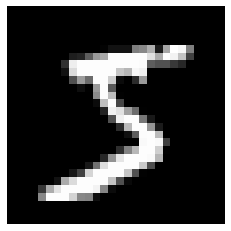

In [4]:
plt.imshow(X.values[0].reshape(28, 28), cmap = 'gray')
plt.axis('off')
plt.show()

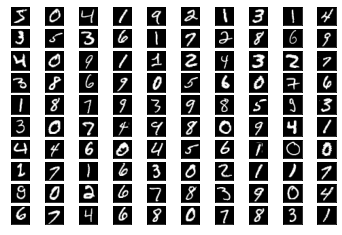

In [6]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X.values[i].reshape(28, 28), cmap = 'gray')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [8]:
y_trainn = [] 
for i in y_train:
    i = int(i)
    y_trainn.append(i)

In [9]:
# from xgboost import XGBClassifier #using xgboost tree classifier to do multiclass classification
# xgb = XGBClassifier() 
# xgb.fit(X_train, y_trainn) #fitting the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [10]:
y_testt = [] 
for i in y_test:
    i = int(i)
    y_testt.append(i)

In [11]:
print(xgb.score(X_train, y_trainn)) # 0.9303619047619047
xgb.score(X_test, y_testt)

1.0


0.982

In [12]:
y_pred = xgb.predict(X_test) #predicting for test script

#confusion matrix for above model
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_testt, y_pred)
cm

array([[344,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 369,   1,   0,   0,   1,   0,   0,   0,   0],
       [  1,   1, 358,   0,   0,   0,   0,   3,   1,   2],
       [  0,   0,   0, 349,   0,   2,   0,   2,   1,   0],
       [  0,   1,   0,   0, 351,   0,   4,   1,   2,   2],
       [  2,   0,   0,   1,   0, 293,   3,   0,   1,   1],
       [  0,   0,   0,   0,   1,   1, 336,   0,   0,   0],
       [  1,   0,   2,   0,   2,   0,   0, 357,   0,   2],
       [  1,   0,   1,   1,   0,   1,   1,   1, 345,   1],
       [  0,   0,   0,   1,   7,   2,   0,   4,   0, 335]], dtype=int64)

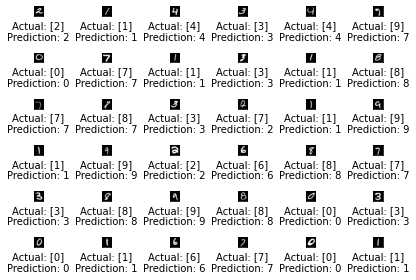

In [13]:
y_testt = pd.DataFrame(data=np.array(y_testt))
#xgb
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test.values[i].reshape(28, 28), cmap = 'gray')
    plt.xlabel('Actual: {}\nPrediction: {}'.format(y_testt.values[i], y_pred[i]))
plt.tight_layout()
plt.show()

In [ ]:
#kaggle predict

In [14]:
X_testkag = pd.read_csv("test.csv")

In [15]:
ypredkaggle = xgb.predict(X_testkag)

In [17]:
len(X_testkag)

28000

In [ ]:
testsub = pd.DataFrame(data= {"ImageId":range(1, 28001), "Label":(ypredkaggle)})
testsub.to_csv("subkaggle.csv", index=False)